## Model testing
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9210478

# making date

In [1]:
import pandas as pd
import numpy as np
import holidays
import warnings
import matplotlib.pyplot as plt
from math import sqrt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'data\UNITED_eeweather_data_1422.csv')

In [3]:
df

,Unnamed: 0,Year,MONTH,DAY,TIME,Load,MW,hour_begins,temp_f
0,13097,2014,6,30,18:00:00,308789.0,308.789,2014-06-30 18:00:00-06:00,81.75164
1,13098,2014,6,30,19:00:00,303820.0,303.820,2014-06-30 19:00:00-06:00,79.88504
2,13099,2014,6,30,20:00:00,290314.0,290.314,2014-06-30 20:00:00-06:00,74.40566
3,13100,2014,6,30,21:00:00,269876.0,269.876,2014-06-30 21:00:00-06:00,69.23264
4,13101,2014,6,30,22:00:00,257788.0,257.788,2014-06-30 22:00:00-06:00,63.74084
...,...,...,...,...,...,...,...,...,...
72988,87619,2022,12,30,20:00:00,417765.0,417.765,2022-12-30 20:00:00-07:00,18.59000
72989,87620,2022,12,30,21:00:00,412312.0,412.312,2022-12-30 21:00:00-07:00,16.90394
72990,87621,2022,12,30,22:00:00,404261.0,404.261,2022-12-30 22:00:00-07:00,18.84506
72991,87622,2022,12,30,23:00:00,392621.0,392.621,2022-12-30 23:00:00-07:00,17.73950


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72993 entries, 0 to 72992
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72993 non-null  int64  
 1   Year         72993 non-null  int64  
 2   MONTH        72993 non-null  int64  
 3   DAY          72993 non-null  int64  
 4   TIME         72993 non-null  object 
 5   Load         72993 non-null  float64
 6   MW           72993 non-null  float64
 7   hour_begins  72993 non-null  object 
 8   temp_f       72993 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 5.0+ MB


In [5]:
# strip 2014-06-30 18:00:00-06:00 into 2014-06-30 18:00:00
df['hour_begins'] = df['hour_begins'].str.slice(0, 19)
df['hour_begins'] = pd.to_datetime(df['hour_begins'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72993 entries, 0 to 72992
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   72993 non-null  int64         
 1   Year         72993 non-null  int64         
 2   MONTH        72993 non-null  int64         
 3   DAY          72993 non-null  int64         
 4   TIME         72993 non-null  object        
 5   Load         72993 non-null  float64       
 6   MW           72993 non-null  float64       
 7   hour_begins  72993 non-null  datetime64[ns]
 8   temp_f       72993 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 5.0+ MB


In [6]:
print(f'The start datetime is {df['hour_begins'].min()}')
print(f'The end datetime is {df['hour_begins'].max()}')

The start datetime is 2014-06-30 18:00:00
The end datetime is 2022-12-31 00:00:00


In [7]:
# rename 
df =df.rename(columns = {'MW':'gross_load','Year':'year', 'MONTH': 'month', 'DAY':'date'})
# from TIME 18:00:00 to get 18 only
df['hour'] = df['TIME'].str.slice(0, 2).astype(int)
df.drop(columns = ['Unnamed: 0',  'Load', 'TIME' ], inplace = True)

In [8]:
df

,year,month,date,gross_load,hour_begins,temp_f,hour
0,2014,6,30,308.789,2014-06-30 18:00:00,81.75164,18
1,2014,6,30,303.820,2014-06-30 19:00:00,79.88504,19
2,2014,6,30,290.314,2014-06-30 20:00:00,74.40566,20
3,2014,6,30,269.876,2014-06-30 21:00:00,69.23264,21
4,2014,6,30,257.788,2014-06-30 22:00:00,63.74084,22
...,...,...,...,...,...,...,...
72988,2022,12,30,417.765,2022-12-30 20:00:00,18.59000,20
72989,2022,12,30,412.312,2022-12-30 21:00:00,16.90394,21
72990,2022,12,30,404.261,2022-12-30 22:00:00,18.84506,22
72991,2022,12,30,392.621,2022-12-30 23:00:00,17.73950,23


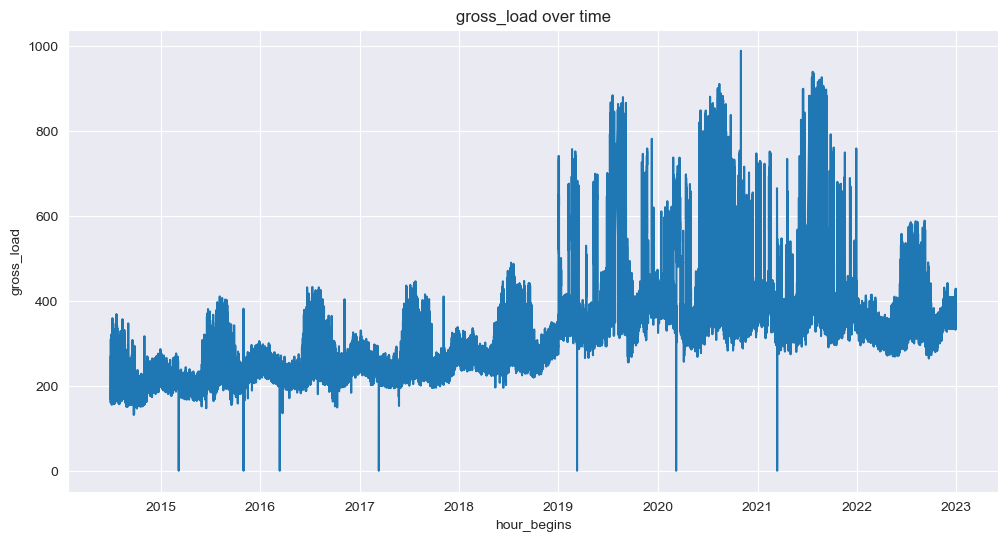

In [9]:
import matplotlib.pyplot as plt

# basic plots for actual_gross_load with x being hour_begins
plt.figure(figsize=(12, 6))
plt.plot(df['hour_begins'], df['gross_load'])
plt.title('gross_load over time')
plt.xlabel('hour_begins')
plt.ylabel('gross_load')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of outliers: 1460


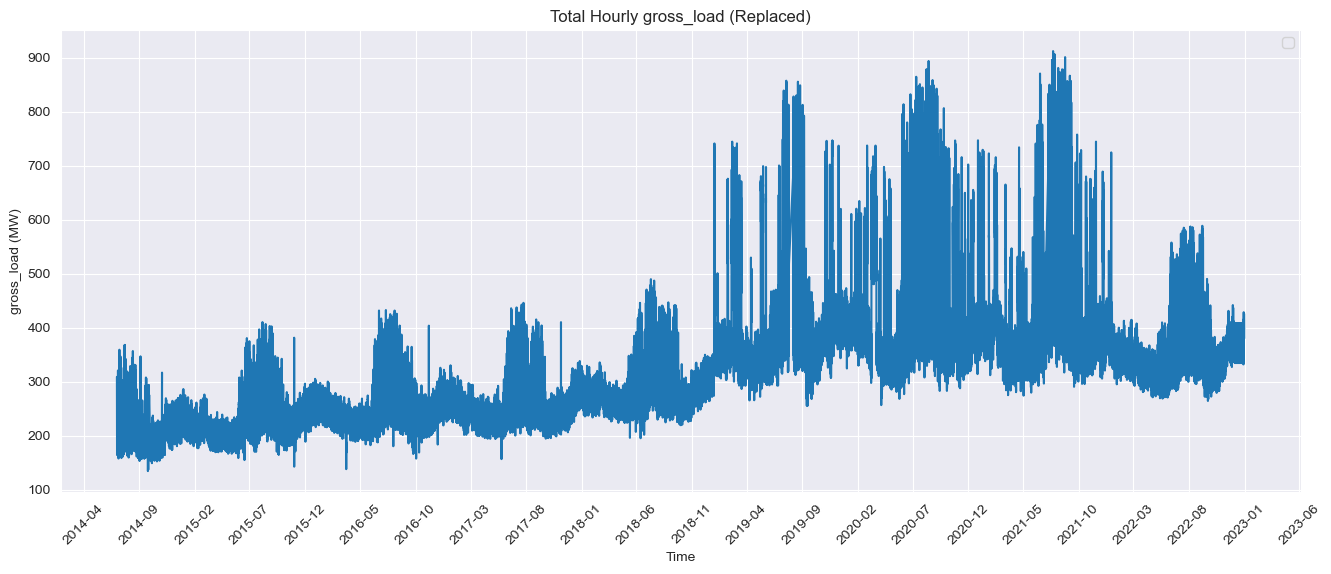

In [10]:
# replace the outlier values as the average of the previous day and the next day
def replace_outliers_with_avg(s):
    lower_bound = s.quantile(0.01)
    upper_bound = s.quantile(0.99)
    outliers = (s < lower_bound) | (s > upper_bound)
    
    for idx in s[outliers].index:
        if idx == 0 or idx == len(s) - 1:
            # directly drop the first and last value
            s.at[idx] = np.nan
            continue
        prev_val = s.iloc[idx - 1]
        next_val = s.iloc[idx + 1]
        s.at[idx] = (prev_val + next_val) / 2
    return s

# reset index 
df.reset_index(drop=True, inplace=True)
# Assuming df is your DataFrame and 'hour_begins' and 'gross_load' are the relevant columns
df['gross_load_replaced'] = replace_outliers_with_avg(df['gross_load'].copy())

# Number of outliers
print(f'Number of outliers: {df[df["gross_load"] != df["gross_load_replaced"]].shape[0]}')

# Plot the replaced 'gross_load_replaced'
plt.figure(figsize=(16, 6))
plt.plot(df['hour_begins'], df['gross_load_replaced'])
plt.xlabel('Time')
plt.ylabel('gross_load (MW)')
plt.title('Total Hourly gross_load (Replaced)')
plt.legend()
# Set date format on x-axis every 5 month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.show()

### feature engineering

In [11]:
# feature engineering
df['month_sin'] = np.sin((df['month'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month'] - 1) * (2. * np.pi / 12))
df['day_sin'] = np.sin((df['date'] - 1) * (2. * np.pi / 31))
df['day_cos'] = np.cos((df['date'] - 1) * (2. * np.pi / 31))
df['hour_sin'] = np.sin(df['hour'] * (2. * np.pi / 24))
df['hour_cos'] = np.cos(df['hour'] * (2. * np.pi / 24))
df['dow'] = df['hour_begins'].dt.dayofweek # 0 means monday
df['dow_sin'] = np.sin(df['dow'] * (2. * np.pi / 7))
df['dow_cos'] = np.cos(df['dow'] * (2. * np.pi / 7))

df['season'] = ['winter' if x in [12, 1, 2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall' for x in df['month']]

# holiday feature
us_holidays = holidays.US()
df['holiday'] = df['hour_begins'].apply(lambda x: x in us_holidays)
df['holiday'] = df['holiday'].astype(int)

In [12]:
df

,year,month,date,gross_load,hour_begins,temp_f,hour,gross_load_replaced,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dow,dow_sin,dow_cos,season,holiday
0,2014,6,30,308.789,2014-06-30 18:00:00,81.75164,18,308.789,0.5,-0.866025,-0.394356,0.918958,-1.000000,-1.836970e-16,0,0.000000,1.000000,summer,0
1,2014,6,30,303.820,2014-06-30 19:00:00,79.88504,19,303.820,0.5,-0.866025,-0.394356,0.918958,-0.965926,2.588190e-01,0,0.000000,1.000000,summer,0
2,2014,6,30,290.314,2014-06-30 20:00:00,74.40566,20,290.314,0.5,-0.866025,-0.394356,0.918958,-0.866025,5.000000e-01,0,0.000000,1.000000,summer,0
3,2014,6,30,269.876,2014-06-30 21:00:00,69.23264,21,269.876,0.5,-0.866025,-0.394356,0.918958,-0.707107,7.071068e-01,0,0.000000,1.000000,summer,0
4,2014,6,30,257.788,2014-06-30 22:00:00,63.74084,22,257.788,0.5,-0.866025,-0.394356,0.918958,-0.500000,8.660254e-01,0,0.000000,1.000000,summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72988,2022,12,30,417.765,2022-12-30 20:00:00,18.59000,20,417.765,-0.5,0.866025,-0.394356,0.918958,-0.866025,5.000000e-01,4,-0.433884,-0.900969,winter,0
72989,2022,12,30,412.312,2022-12-30 21:00:00,16.90394,21,412.312,-0.5,0.866025,-0.394356,0.918958,-0.707107,7.071068e-01,4,-0.433884,-0.900969,winter,0
72990,2022,12,30,404.261,2022-12-30 22:00:00,18.84506,22,404.261,-0.5,0.866025,-0.394356,0.918958,-0.500000,8.660254e-01,4,-0.433884,-0.900969,winter,0
72991,2022,12,30,392.621,2022-12-30 23:00:00,17.73950,23,392.621,-0.5,0.866025,-0.394356,0.918958,-0.258819,9.659258e-01,4,-0.433884,-0.900969,winter,0


In [13]:
# 3 days shift
df_ = df.copy()

# Calculate the hour_begins 3 days ago
df_['hour_begins_3d'] = df_['hour_begins'] - pd.Timedelta(days=3)
# Rename columns to avoid duplication
df_3d = df_[['hour_begins', 'gross_load_replaced']].copy()
df_3d.columns = ['hour_begins_3d', 'gross_load_replaced_3d']

# Merge the 3 days ago data with the original data
df_merged = df_.merge(df_3d, left_on='hour_begins_3d', right_on='hour_begins_3d', how='left')

# Display information about the merged DataFrame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73001 entries, 0 to 73000
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    73001 non-null  int64         
 1   month                   73001 non-null  int64         
 2   date                    73001 non-null  int64         
 3   gross_load              73001 non-null  float64       
 4   hour_begins             73001 non-null  datetime64[ns]
 5   temp_f                  73001 non-null  float64       
 6   hour                    73001 non-null  int32         
 7   gross_load_replaced     73001 non-null  float64       
 8   month_sin               73001 non-null  float64       
 9   month_cos               73001 non-null  float64       
 10  day_sin                 73001 non-null  float64       
 11  day_cos                 73001 non-null  float64       
 12  hour_sin                73001 non-null  float6

In [14]:
df_merged[df_merged['gross_load_replaced_3d'].isnull()]

,year,month,date,gross_load,hour_begins,temp_f,hour,gross_load_replaced,month_sin,month_cos,...,day_cos,hour_sin,hour_cos,dow,dow_sin,dow_cos,season,holiday,hour_begins_3d,gross_load_replaced_3d
0,2014,6,30,308.789,2014-06-30 18:00:00,81.75164,18,308.789,0.5,-0.866025,...,0.918958,-1.000000,-1.836970e-16,0,0.000000,1.00000,summer,0,2014-06-27 18:00:00,NaN
1,2014,6,30,303.820,2014-06-30 19:00:00,79.88504,19,303.820,0.5,-0.866025,...,0.918958,-0.965926,2.588190e-01,0,0.000000,1.00000,summer,0,2014-06-27 19:00:00,NaN
2,2014,6,30,290.314,2014-06-30 20:00:00,74.40566,20,290.314,0.5,-0.866025,...,0.918958,-0.866025,5.000000e-01,0,0.000000,1.00000,summer,0,2014-06-27 20:00:00,NaN
3,2014,6,30,269.876,2014-06-30 21:00:00,69.23264,21,269.876,0.5,-0.866025,...,0.918958,-0.707107,7.071068e-01,0,0.000000,1.00000,summer,0,2014-06-27 21:00:00,NaN
4,2014,6,30,257.788,2014-06-30 22:00:00,63.74084,22,257.788,0.5,-0.866025,...,0.918958,-0.500000,8.660254e-01,0,0.000000,1.00000,summer,0,2014-06-27 22:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72861,2022,12,25,340.569,2022-12-25 05:00:00,21.47900,5,340.569,-0.5,0.866025,...,0.151428,0.965926,2.588190e-01,6,-0.781831,0.62349,winter,1,2022-12-22 05:00:00,NaN
72862,2022,12,25,354.089,2022-12-25 06:00:00,25.37456,6,354.089,-0.5,0.866025,...,0.151428,1.000000,6.123234e-17,6,-0.781831,0.62349,winter,1,2022-12-22 06:00:00,NaN
72863,2022,12,25,368.123,2022-12-25 07:00:00,30.92756,7,368.123,-0.5,0.866025,...,0.151428,0.965926,-2.588190e-01,6,-0.781831,0.62349,winter,1,2022-12-22 07:00:00,NaN
72864,2022,12,25,373.124,2022-12-25 08:00:00,46.68656,8,373.124,-0.5,0.866025,...,0.151428,0.866025,-5.000000e-01,6,-0.781831,0.62349,winter,1,2022-12-22 08:00:00,NaN


In [15]:
# df_merged drop nan
df_merged.dropna(inplace=True)
print(df_merged.columns)
# time stamp min and max
print(f'\nThe start hour_begins is: {df_merged['hour_begins'].min()}')
print(f'The end hour_begins is: {df_merged['hour_begins'].max()}\n')

print(df_merged.info())

Index(['year', 'month', 'date', 'gross_load', 'hour_begins', 'temp_f', 'hour',
       'gross_load_replaced', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'hour_sin', 'hour_cos', 'dow', 'dow_sin', 'dow_cos', 'season',
       'holiday', 'hour_begins_3d', 'gross_load_replaced_3d'],
      dtype='object')

The start hour_begins is: 2014-07-03 18:00:00
The end hour_begins is: 2022-12-31 00:00:00

<class 'pandas.core.frame.DataFrame'>
Index: 71671 entries, 72 to 73000
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    71671 non-null  int64         
 1   month                   71671 non-null  int64         
 2   date                    71671 non-null  int64         
 3   gross_load              71671 non-null  float64       
 4   hour_begins             71671 non-null  datetime64[ns]
 5   temp_f                  71671 non-null  float64       
 6   hour  

In [16]:
df_merged.columns

Index(['year', 'month', 'date', 'gross_load', 'hour_begins', 'temp_f', 'hour',
       'gross_load_replaced', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'hour_sin', 'hour_cos', 'dow', 'dow_sin', 'dow_cos', 'season',
       'holiday', 'hour_begins_3d', 'gross_load_replaced_3d'],
      dtype='object')

### preprocessing

In [17]:
# reorder the columns
column = ['hour_begins','gross_load_replaced_3d', 'year', 'month', 'dow',  'season', 'holiday','month_sin', 'month_cos', 'hour_sin', 'hour_cos','dow_sin', 'dow_cos', 'gross_load_replaced' ]
LSTM_df = df_merged[column]

In [18]:
LSTM_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71671 entries, 72 to 73000
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hour_begins             71671 non-null  datetime64[ns]
 1   gross_load_replaced_3d  71671 non-null  float64       
 2   year                    71671 non-null  int64         
 3   month                   71671 non-null  int64         
 4   dow                     71671 non-null  int32         
 5   season                  71671 non-null  object        
 6   holiday                 71671 non-null  int32         
 7   month_sin               71671 non-null  float64       
 8   month_cos               71671 non-null  float64       
 9   hour_sin                71671 non-null  float64       
 10  hour_cos                71671 non-null  float64       
 11  dow_sin                 71671 non-null  float64       
 12  dow_cos                 71671 non-null  float64   

In [19]:
LSTM_df = pd.get_dummies(LSTM_df, columns=['season'], drop_first=True) # at the last 3 columns
# Convert boolean columns to integers
for col in LSTM_df.columns:
    if LSTM_df[col].dtype == 'bool':
        LSTM_df[col] = LSTM_df[col].astype(int)
# place the target variable at the last column
LSTM_df = LSTM_df[[c for c in LSTM_df if c not in ['gross_load_replaced']] + ['gross_load_replaced']]
LSTM_df

,hour_begins,gross_load_replaced_3d,year,month,dow,holiday,month_sin,month_cos,hour_sin,hour_cos,dow_sin,dow_cos,season_spring,season_summer,season_winter,gross_load_replaced
72,2014-07-03 18:00:00,308.789,2014,7,3,0,1.224647e-16,-1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,0,1,0,315.169
73,2014-07-03 19:00:00,303.820,2014,7,3,0,1.224647e-16,-1.000000,-0.965926,2.588190e-01,0.433884,-0.900969,0,1,0,296.100
74,2014-07-03 20:00:00,290.314,2014,7,3,0,1.224647e-16,-1.000000,-0.866025,5.000000e-01,0.433884,-0.900969,0,1,0,280.782
75,2014-07-03 21:00:00,269.876,2014,7,3,0,1.224647e-16,-1.000000,-0.707107,7.071068e-01,0.433884,-0.900969,0,1,0,270.472
76,2014-07-03 22:00:00,257.788,2014,7,3,0,1.224647e-16,-1.000000,-0.500000,8.660254e-01,0.433884,-0.900969,0,1,0,264.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72996,2022-12-30 20:00:00,403.336,2022,12,4,0,-5.000000e-01,0.866025,-0.866025,5.000000e-01,-0.433884,-0.900969,0,0,1,417.765
72997,2022-12-30 21:00:00,396.810,2022,12,4,0,-5.000000e-01,0.866025,-0.707107,7.071068e-01,-0.433884,-0.900969,0,0,1,412.312
72998,2022-12-30 22:00:00,385.608,2022,12,4,0,-5.000000e-01,0.866025,-0.500000,8.660254e-01,-0.433884,-0.900969,0,0,1,404.261
72999,2022-12-30 23:00:00,370.773,2022,12,4,0,-5.000000e-01,0.866025,-0.258819,9.659258e-01,-0.433884,-0.900969,0,0,1,392.621


In [20]:
# scaling the columns except for the 1 column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
LSTM_df.iloc[:, 1:] = scaler.fit_transform(LSTM_df.iloc[:, 1:])
LSTM_df

,hour_begins,gross_load_replaced_3d,year,month,dow,holiday,month_sin,month_cos,hour_sin,hour_cos,dow_sin,dow_cos,season_spring,season_summer,season_winter,gross_load_replaced
72,2014-07-03 18:00:00,0.224306,0.0,0.545455,0.500000,0,0.50,0.000000,0.000000,0.500000,0.722521,5.551115e-17,0,1,0,0.232509
73,2014-07-03 19:00:00,0.217917,0.0,0.545455,0.500000,0,0.50,0.000000,0.017037,0.629410,0.722521,5.551115e-17,0,1,0,0.207991
74,2014-07-03 20:00:00,0.200552,0.0,0.545455,0.500000,0,0.50,0.000000,0.066987,0.750000,0.722521,5.551115e-17,0,1,0,0.188297
75,2014-07-03 21:00:00,0.174275,0.0,0.545455,0.500000,0,0.50,0.000000,0.146447,0.853553,0.722521,5.551115e-17,0,1,0,0.175041
76,2014-07-03 22:00:00,0.158733,0.0,0.545455,0.500000,0,0.50,0.000000,0.250000,0.933013,0.722521,5.551115e-17,0,1,0,0.167940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72996,2022-12-30 20:00:00,0.345867,1.0,1.000000,0.666667,0,0.25,0.933013,0.066987,0.750000,0.277479,0.000000e+00,0,0,1,0.364418
72997,2022-12-30 21:00:00,0.337476,1.0,1.000000,0.666667,0,0.25,0.933013,0.146447,0.853553,0.277479,0.000000e+00,0,0,1,0.357407
72998,2022-12-30 22:00:00,0.323073,1.0,1.000000,0.666667,0,0.25,0.933013,0.250000,0.933013,0.277479,0.000000e+00,0,0,1,0.347056
72999,2022-12-30 23:00:00,0.304000,1.0,1.000000,0.666667,0,0.25,0.933013,0.370590,0.982963,0.277479,0.000000e+00,0,0,1,0.332090


In [21]:
LSTM_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71671 entries, 72 to 73000
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   hour_begins             71671 non-null  datetime64[ns]
 1   gross_load_replaced_3d  71671 non-null  float64       
 2   year                    71671 non-null  float64       
 3   month                   71671 non-null  float64       
 4   dow                     71671 non-null  float64       
 5   holiday                 71671 non-null  int32         
 6   month_sin               71671 non-null  float64       
 7   month_cos               71671 non-null  float64       
 8   hour_sin                71671 non-null  float64       
 9   hour_cos                71671 non-null  float64       
 10  dow_sin                 71671 non-null  float64       
 11  dow_cos                 71671 non-null  float64       
 12  season_spring           71671 non-null  int32     

### dividing the dataset

In [22]:
years_of_data = len(LSTM_df) / (365 * 24)
print(f'Total years of data: {years_of_data}')

Total years of data: 8.18162100456621


In [23]:
LSTM_df = LSTM_df.sort_values(by = 'hour_begins', ascending = True)
# out of sample data: final 1 years
ofs_number = 365 *12
LSTM_df_ofs = LSTM_df.iloc[-ofs_number:, :]
LSTM_df = LSTM_df.iloc[:-ofs_number, :]
print(f'start date of out of sample data: {LSTM_df_ofs["hour_begins"].min()}')
print(f'end date of out of sample data: {LSTM_df_ofs["hour_begins"].max()}')

start date of out of sample data: 2022-06-30 01:00:00
end date of out of sample data: 2022-12-31 00:00:00


In [24]:
print(f'Total number of days for training: {LSTM_df.shape[0]}')

Total number of days for training: 67291


In [25]:
LSTM_df = LSTM_df.sort_values(by='hour_begins')
values = LSTM_df.drop(columns='hour_begins').values
hour_begins = LSTM_df['hour_begins']

# out of sample data: total length multiplies 0.3
n_train_hours = int(values.shape[0] * 0.8)
# in sample data: the rest of the data
train = values[:n_train_hours, :]
train_timestamps = hour_begins[:n_train_hours]
# print(f'start date of in sample data: {train["date"].min()}')
# print(f'end date of in sample data: {train["date"].max()}')
# print(f'length of in sample data: {train.
# shape[0]}\n')

print(f'min: {train_timestamps.min()}')
print(f'max: {train_timestamps.max()}')
print(f'length of training data: {train.shape[0]}\n')

test = values[n_train_hours:, : ]
test_timestamps = hour_begins[n_train_hours:]
# print(f'start date of out of sample data: {test["date"].min()}')
# print(f'end date of out of sample data: {test["date"].max()}')
# print(f'length of out of sample data: {test.shape[0]}\n')

print(f'min: {test_timestamps.min()}')
print(f'max: {test_timestamps.max()}')
print(f'length of testing data: {test.shape[0]}')

min: 2014-07-03 18:00:00
max: 2020-11-23 08:00:00
length of training data: 53832

min: 2020-11-23 09:00:00
max: 2022-06-30 00:00:00
length of testing data: 13459


In [26]:
# dividing the data into x and y
# x: All columns except the last,  y: The last column
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(53832, 1, 14) (53832,) (13459, 1, 14) (13459,)


# model

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, ReLU, Dropout, LSTM, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def build_model(input_shape):
    input_layer = Input(shape=input_shape)
    
    # CNN Feature Extraction
    x = Conv1D(48, 3, padding='same')(input_layer)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(32, 3, padding='same')(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(16, 3, padding='same')(x)
    x = ReLU()(x)
    x = Dropout(0.25)(x)
    
    # Sequence Learning
    x = LSTM(20, return_sequences=True)(x)
    x = Dropout(0.25)(x)
    x = LSTM(20, return_sequences=True)(x)
    x = Dropout(0.25)(x)
    x = LSTM(20, return_sequences=False)(x)
    
    # Fully Connected Layer
    x = Dense(20, activation='relu')(x)
    
    # Output Layer
    output_layer = Dense(1, activation='linear')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
    
    return model


In [ ]:
# Example usage
input_shape = (None, 10)  # Replace None and 10 with the actual sequence length and number of features
model = build_model(input_shape)

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=1e-5)

# Dummy data for example purposes
import numpy as np
X_train = np.random.random((1000, 50, 10))  # Replace with your actual training data
y_train = np.random.random((1000, 1))       # Replace with your actual training labels
X_val = np.random.random((200, 50, 10))     # Replace with your actual validation data
y_val = np.random.random((200, 1))          # Replace with your actual validation labels

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=128,
    callbacks=[reduce_lr]
)

# Model summary
model.summary()